In [19]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn 
import torch.nn.functional as F

In [4]:
train = datasets.MNIST("", train =True, download = True, 
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train =False, download = True, 
                       transform=transforms.Compose([transforms.ToTensor()]))

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|████████████████████████████| 9912422/9912422 [00:05<00:00, 1773476.98it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 238280.19it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 2526228.44it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 1053563.14it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10,shuffle=True)

In [8]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [9]:
x, y = data[0][0], data[1][0]

print(y)

tensor(6)


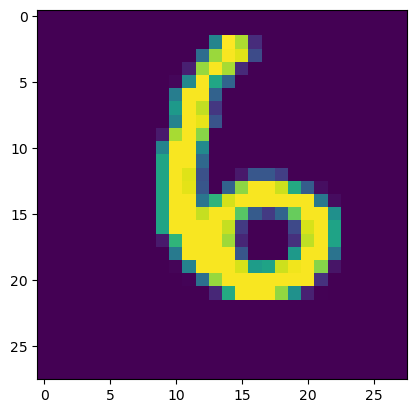

In [11]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

In [10]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [17]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] +=1
        total += 1 

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [18]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [24]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)


    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

 

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [27]:
X =torch.rand((28,28))
X= X.view(-1, 28*28)

In [29]:
output= net(X)

In [30]:
output

tensor([[-2.2501, -2.3177, -2.2961, -2.2979, -2.4430, -2.3068, -2.3695, -2.2777,
         -2.2682, -2.2166]], grad_fn=<LogSoftmaxBackward0>)

In [33]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS =3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0174, grad_fn=<NllLossBackward0>)
tensor(0.0180, grad_fn=<NllLossBackward0>)


In [41]:
correct =0
total =0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1

print("Accuracy:", round(correct/total, 3))

Accuracy: 0.968


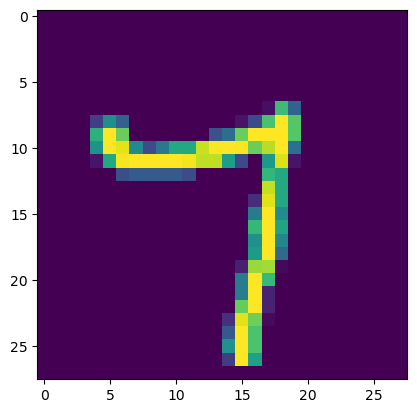

In [51]:
import matplotlib.pyplot as plt
plt.imshow(X[9].view(28,28))
plt.show()

In [52]:
print(torch.argmax(net(X[9].view(-1,784))[0]))

tensor(7)
